In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc
from dash import html

In [9]:
df=pd.read_csv(r'C:\Users\ritod\OneDrive\Desktop\Dv\Placement_Data_Full_Class.csv',encoding='latin-1')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21285 entries, 0 to 21284
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           21285 non-null  int64  
 1   gender          21285 non-null  object 
 2   ssc_p           21285 non-null  float64
 3   ssc_b           21285 non-null  object 
 4   hsc_p           21285 non-null  float64
 5   hsc_b           21285 non-null  object 
 6   hsc_s           21285 non-null  object 
 7   degree_p        21285 non-null  float64
 8   degree_t        21285 non-null  object 
 9   workex          21285 non-null  object 
 10  etest_p         21285 non-null  float64
 11  specialisation  21285 non-null  object 
 12  mba_p           21285 non-null  float64
 13  status          21285 non-null  object 
 14  salary          14652 non-null  float64
dtypes: float64(6), int64(1), object(8)
memory usage: 2.4+ MB


In [20]:
df = df.drop(columns=['sl_no'])

In [21]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [22]:
df['salary'].fillna(0, inplace=True)

In [23]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [81]:
df['specialisation'].value_counts()

0    11880
1     9405
Name: specialisation, dtype: int64

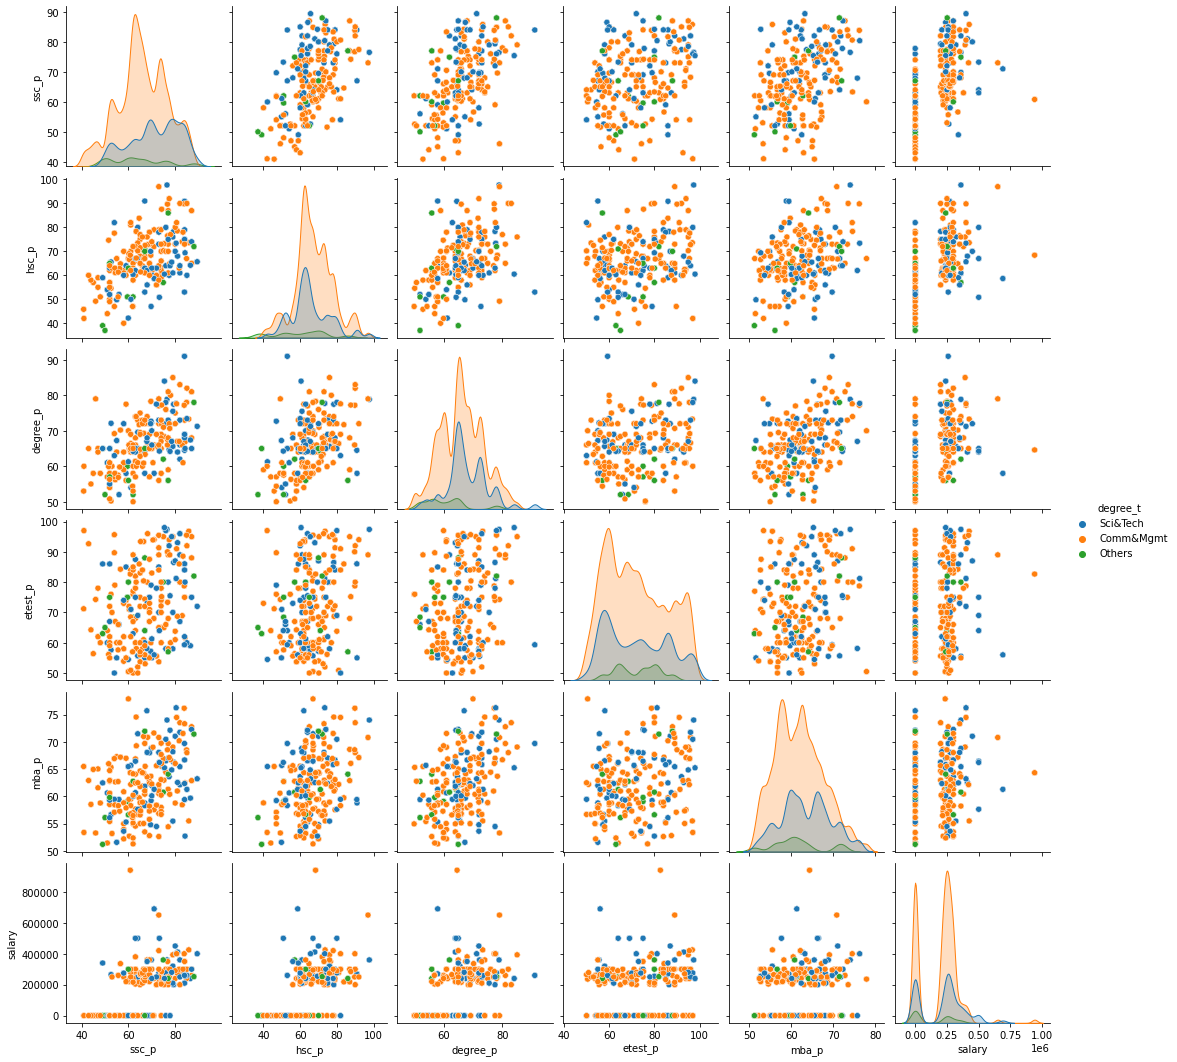

In [25]:
sns.pairplot(df, hue="degree_t")
plt.show()

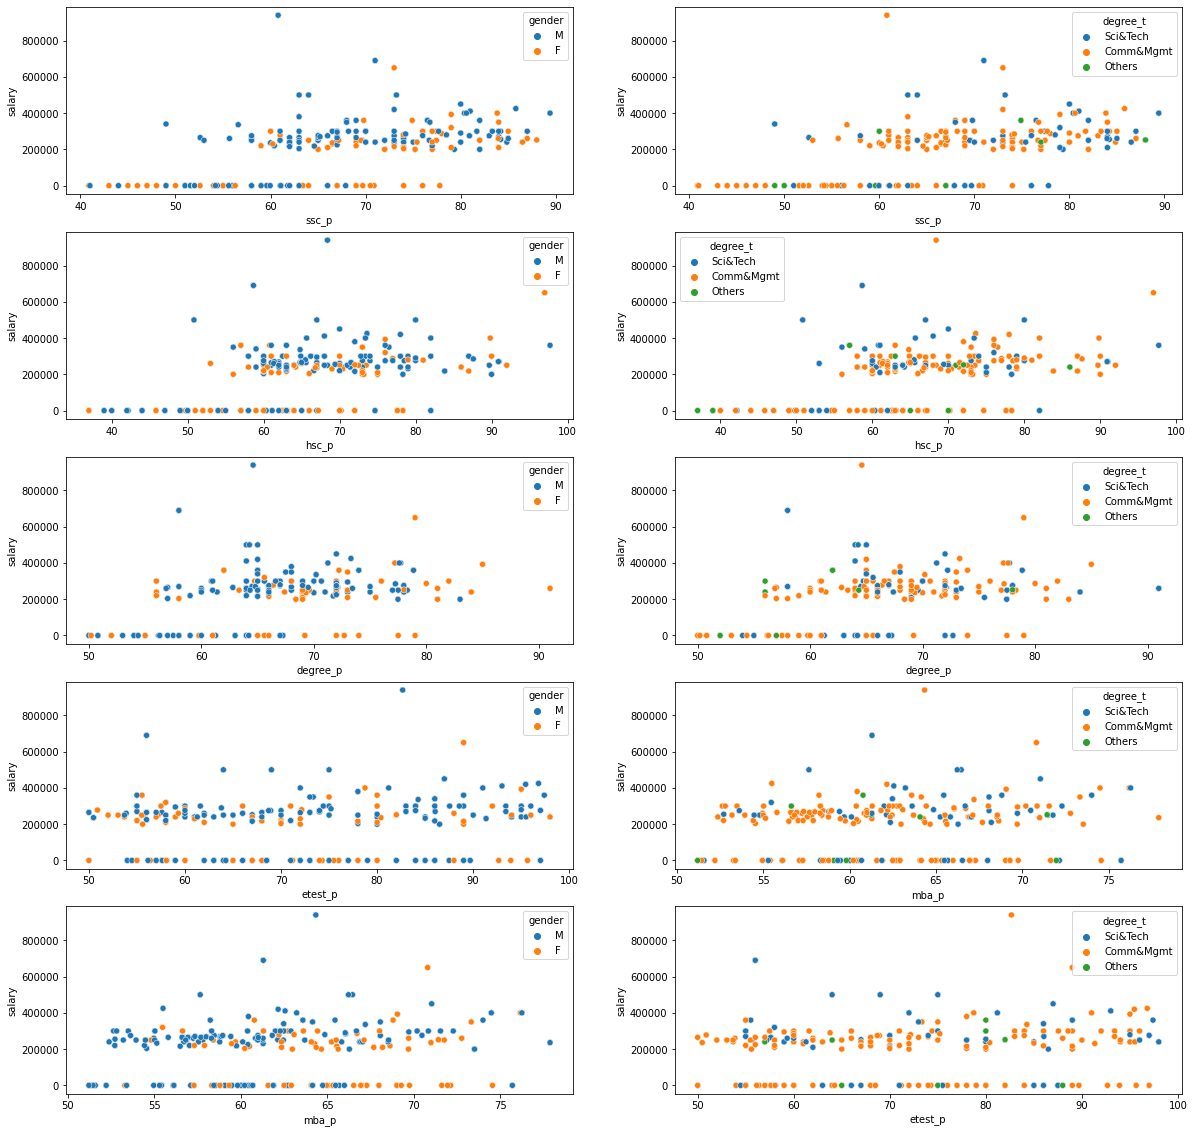

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
sns.scatterplot(data=df, x="ssc_p", y="salary", hue="gender")
plt.subplot(5,2,2)
sns.scatterplot(data=df, x="ssc_p", y="salary", hue="degree_t")
plt.subplot(5,2,3)
sns.scatterplot(data=df, x="hsc_p", y="salary", hue="gender")
plt.subplot(5,2,4)
sns.scatterplot(data=df, x="hsc_p", y="salary", hue="degree_t")
plt.subplot(5,2,5)
sns.scatterplot(data=df, x="degree_p", y="salary", hue="gender")
plt.subplot(5,2,6)
sns.scatterplot(data=df, x="degree_p", y="salary", hue="degree_t")
plt.subplot(5,2,7)
sns.scatterplot(data=df, x="etest_p", y="salary", hue="gender")
plt.subplot(5,2,8)
sns.scatterplot(data=df, x="mba_p", y="salary", hue="degree_t")
plt.subplot(5,2,9)
sns.scatterplot(data=df, x="mba_p", y="salary", hue="gender")
plt.subplot(5,2,10)
sns.scatterplot(data=df, x="etest_p", y="salary", hue="degree_t")
plt.show()


In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['degree'] = le.fit_transform(df['degree_t'])

<AxesSubplot:xlabel='degree_t', ylabel='placed'>

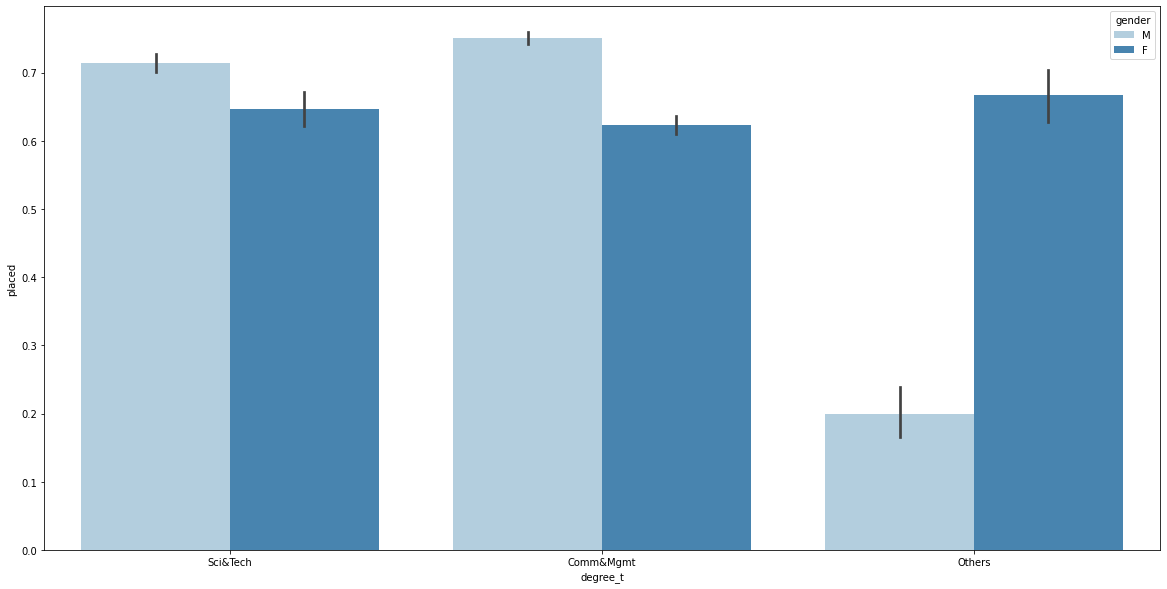

In [59]:
plt.figure(figsize=(20,10))
sns.barplot(x = df['degree_t'],
            y = df['placed'],
            data = df,
            hue=df['gender'],
            palette= 'Blues')

<AxesSubplot:xlabel='workex', ylabel='placed'>

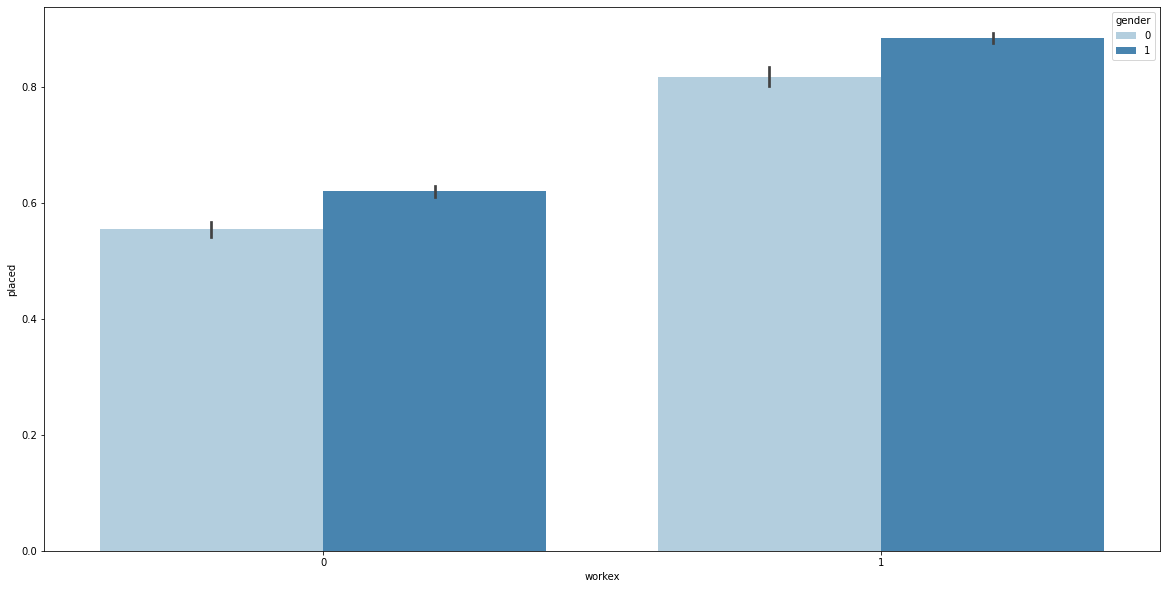

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(x = df['workex'],
            y = df['placed'],
            data = df,
            hue=df['gender'],
            palette= 'Blues')

In [66]:
df1 = df
le1 = preprocessing.LabelEncoder()
for col in df1:
    if(df[col].dtype=='object'):
        df1[col]=le.fit_transform(df1[col])

<AxesSubplot:>

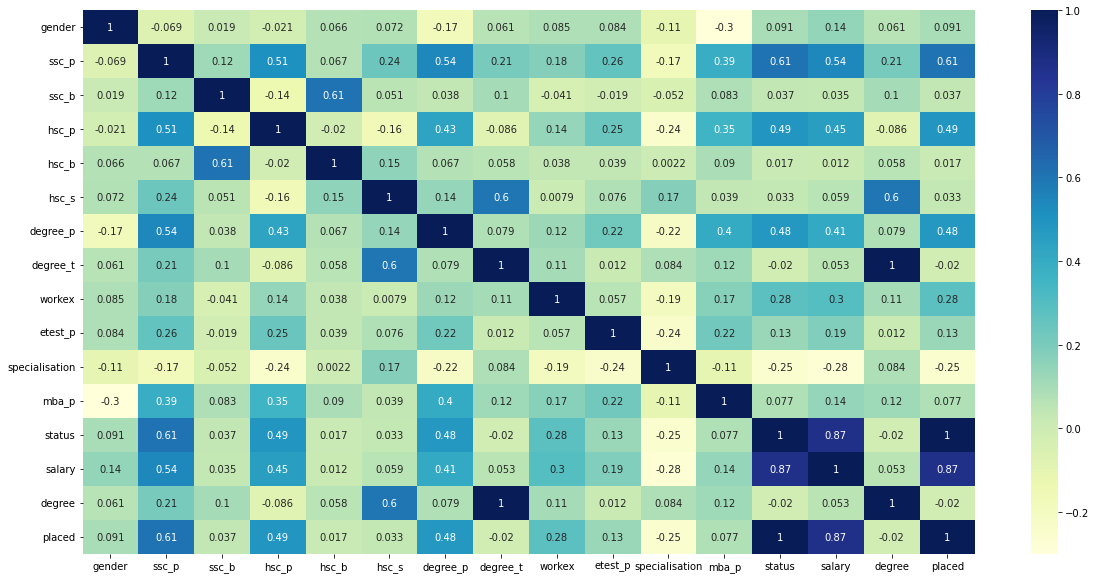

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

C:\Users\ritod\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritod\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

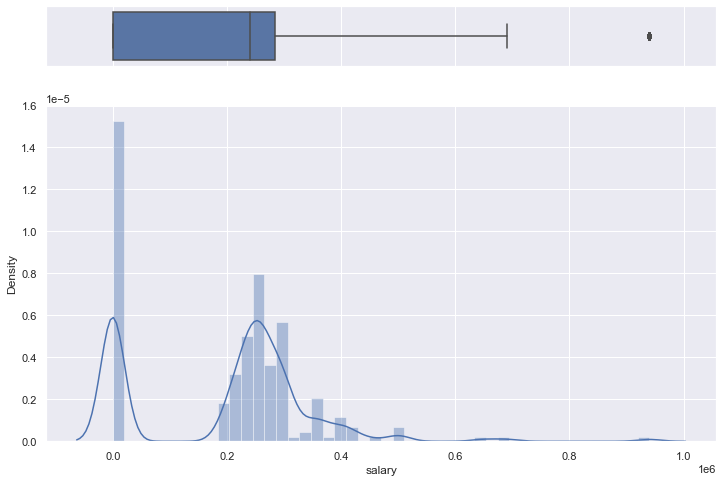

In [72]:
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

#placement_placed = placement_filtered[placement_filtered.salary != 0]
sns.boxplot(df["salary"], ax=ax_box)
sns.distplot(df["salary"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

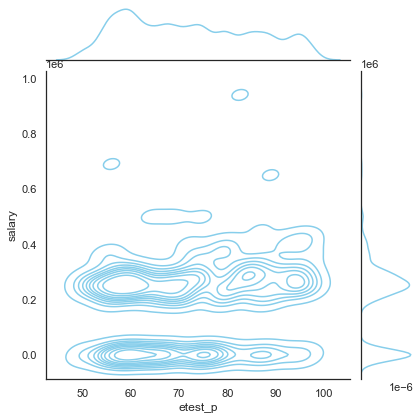

In [73]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["etest_p"], y=df["salary"], kind='kde', color="skyblue")

In [ ]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()

In [78]:
import plotly_express as px
gapminder=px.data.gapminder()
px.scatter(df,x="mba_p",y="etest_p",color="status",facet_col="workex")

In [79]:
px.violin(df,y="salary",x="specialisation",color="gender",box=True,points="all")

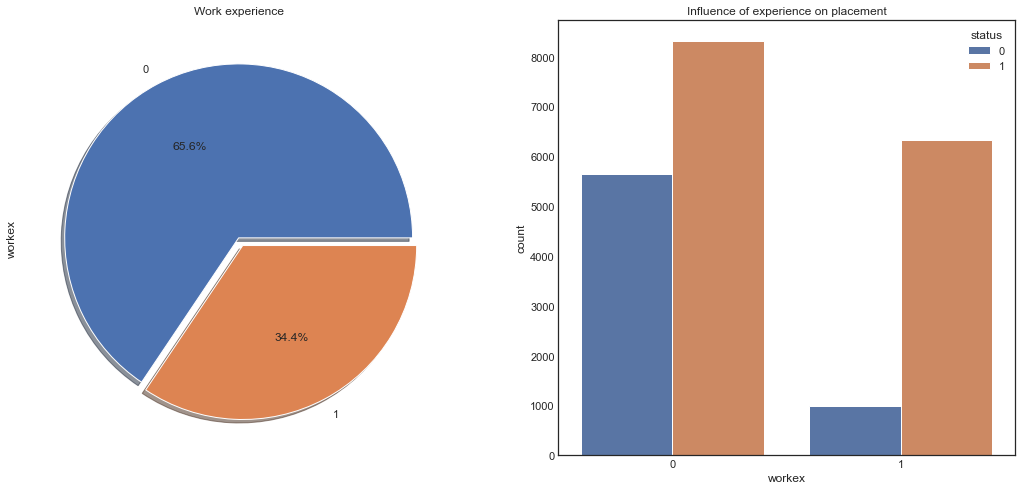

In [80]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = df)
ax[1].set_title('Influence of experience on placement')
plt.show()